# Exercise 02

## Section 1: Querying a database in python

In [1]:
# 1. Connect to your local postgres instance from python (the pyscopg2 library is relatively straightforward).

import psycopg2

# Connect to postgres DB
conn = psycopg2.connect(host="localhost", database="dvdrental", user="postgres", password="password")

# Open a cursor to perform database operations
cur = conn.cursor()

In [2]:
# 2. Write a query to return a dataset with film, rental, and payment information. 
# Your dataset should have multiple rows per film, one for each time the film was 
# rented and the amount spent on each rental. Create a dataframe with this information

import pandas as pd

# Execute a query and read the result into a dataframe
df_rental = pd.read_sql_query("""
    select f.title, r.rental_id, r.rental_date, p.amount
    from film f join inventory i on f.film_id = i.film_id
    join rental r on i.inventory_id = r.inventory_id
    join payment p on r.rental_id = p.rental_id
    ;""", con = conn)

In [3]:
df_rental.head(10)

,title,rental_id,rental_date,amount
0,Rules Human,1520,2005-06-15 23:57:20,7.99
1,Majestic Floats,1778,2005-06-16 18:54:48,1.99
2,Maiden Home,1849,2005-06-17 00:13:19,7.99
3,Hyde Doctor,2829,2005-06-19 21:11:30,2.99
4,Massacre Usual,3130,2005-06-20 19:03:22,7.99
5,Annie Identity,3382,2005-06-21 14:05:23,5.99
6,Wash Heavenly,2190,2005-06-18 01:29:51,5.99
7,Lola Agent,2914,2005-06-20 03:43:18,5.99
8,Identity Lover,3081,2005-06-20 15:29:13,2.99
9,Opposite Necklace,1547,2005-06-16 01:42:24,4.99


In [4]:
# 3. Create a dataframe from the customer table

df_customer = pd.read_sql_query("select * from customer;", con = conn)

In [5]:
df_customer.head(10)

,customer_id,store_id,first_name,last_name,email,address_id,activebool,create_date,last_update,active
0,524,1,Jared,Ely,jared.ely@sakilacustomer.org,530,True,2006-02-14,2013-05-26 14:49:45.738,1
1,1,1,Mary,Smith,mary.smith@sakilacustomer.org,5,True,2006-02-14,2013-05-26 14:49:45.738,1
2,2,1,Patricia,Johnson,patricia.johnson@sakilacustomer.org,6,True,2006-02-14,2013-05-26 14:49:45.738,1
3,3,1,Linda,Williams,linda.williams@sakilacustomer.org,7,True,2006-02-14,2013-05-26 14:49:45.738,1
4,4,2,Barbara,Jones,barbara.jones@sakilacustomer.org,8,True,2006-02-14,2013-05-26 14:49:45.738,1
5,5,1,Elizabeth,Brown,elizabeth.brown@sakilacustomer.org,9,True,2006-02-14,2013-05-26 14:49:45.738,1
6,6,2,Jennifer,Davis,jennifer.davis@sakilacustomer.org,10,True,2006-02-14,2013-05-26 14:49:45.738,1
7,7,1,Maria,Miller,maria.miller@sakilacustomer.org,11,True,2006-02-14,2013-05-26 14:49:45.738,1
8,8,2,Susan,Wilson,susan.wilson@sakilacustomer.org,12,True,2006-02-14,2013-05-26 14:49:45.738,1
9,9,2,Margaret,Moore,margaret.moore@sakilacustomer.org,13,True,2006-02-14,2013-05-26 14:49:45.738,1


## Section 2: Manipulating dataframes

In [6]:
# 1. Create a column for customer_name that has the first name and last name in the same column.

df_customer["customer_name"] = df_customer.first_name + " " + df_customer.last_name

In [7]:
df_customer.head(10)

,customer_id,store_id,first_name,last_name,email,address_id,activebool,create_date,last_update,active,customer_name
0,524,1,Jared,Ely,jared.ely@sakilacustomer.org,530,True,2006-02-14,2013-05-26 14:49:45.738,1,Jared Ely
1,1,1,Mary,Smith,mary.smith@sakilacustomer.org,5,True,2006-02-14,2013-05-26 14:49:45.738,1,Mary Smith
2,2,1,Patricia,Johnson,patricia.johnson@sakilacustomer.org,6,True,2006-02-14,2013-05-26 14:49:45.738,1,Patricia Johnson
3,3,1,Linda,Williams,linda.williams@sakilacustomer.org,7,True,2006-02-14,2013-05-26 14:49:45.738,1,Linda Williams
4,4,2,Barbara,Jones,barbara.jones@sakilacustomer.org,8,True,2006-02-14,2013-05-26 14:49:45.738,1,Barbara Jones
5,5,1,Elizabeth,Brown,elizabeth.brown@sakilacustomer.org,9,True,2006-02-14,2013-05-26 14:49:45.738,1,Elizabeth Brown
6,6,2,Jennifer,Davis,jennifer.davis@sakilacustomer.org,10,True,2006-02-14,2013-05-26 14:49:45.738,1,Jennifer Davis
7,7,1,Maria,Miller,maria.miller@sakilacustomer.org,11,True,2006-02-14,2013-05-26 14:49:45.738,1,Maria Miller
8,8,2,Susan,Wilson,susan.wilson@sakilacustomer.org,12,True,2006-02-14,2013-05-26 14:49:45.738,1,Susan Wilson
9,9,2,Margaret,Moore,margaret.moore@sakilacustomer.org,13,True,2006-02-14,2013-05-26 14:49:45.738,1,Margaret Moore


In [8]:
# 2. Remove any inactive customers from the dataframe

df_customer.drop(df_customer[df_customer["active"]==0].index, inplace=True)

In [9]:
print(df_customer.shape, "\n")
df_customer.head(10)

(584, 11) 



,customer_id,store_id,first_name,last_name,email,address_id,activebool,create_date,last_update,active,customer_name
0,524,1,Jared,Ely,jared.ely@sakilacustomer.org,530,True,2006-02-14,2013-05-26 14:49:45.738,1,Jared Ely
1,1,1,Mary,Smith,mary.smith@sakilacustomer.org,5,True,2006-02-14,2013-05-26 14:49:45.738,1,Mary Smith
2,2,1,Patricia,Johnson,patricia.johnson@sakilacustomer.org,6,True,2006-02-14,2013-05-26 14:49:45.738,1,Patricia Johnson
3,3,1,Linda,Williams,linda.williams@sakilacustomer.org,7,True,2006-02-14,2013-05-26 14:49:45.738,1,Linda Williams
4,4,2,Barbara,Jones,barbara.jones@sakilacustomer.org,8,True,2006-02-14,2013-05-26 14:49:45.738,1,Barbara Jones
5,5,1,Elizabeth,Brown,elizabeth.brown@sakilacustomer.org,9,True,2006-02-14,2013-05-26 14:49:45.738,1,Elizabeth Brown
6,6,2,Jennifer,Davis,jennifer.davis@sakilacustomer.org,10,True,2006-02-14,2013-05-26 14:49:45.738,1,Jennifer Davis
7,7,1,Maria,Miller,maria.miller@sakilacustomer.org,11,True,2006-02-14,2013-05-26 14:49:45.738,1,Maria Miller
8,8,2,Susan,Wilson,susan.wilson@sakilacustomer.org,12,True,2006-02-14,2013-05-26 14:49:45.738,1,Susan Wilson
9,9,2,Margaret,Moore,margaret.moore@sakilacustomer.org,13,True,2006-02-14,2013-05-26 14:49:45.738,1,Margaret Moore


In [10]:
#3. Change the email addresses to be ‘joe.person@wustl.edu’, but only when their store_id is an even number

df_customer[df_customer["store_id"]%2==0]

,customer_id,store_id,first_name,last_name,email,address_id,activebool,create_date,last_update,active,customer_name
4,4,2,Barbara,Jones,barbara.jones@sakilacustomer.org,8,True,2006-02-14,2013-05-26 14:49:45.738,1,Barbara Jones
6,6,2,Jennifer,Davis,jennifer.davis@sakilacustomer.org,10,True,2006-02-14,2013-05-26 14:49:45.738,1,Jennifer Davis
8,8,2,Susan,Wilson,susan.wilson@sakilacustomer.org,12,True,2006-02-14,2013-05-26 14:49:45.738,1,Susan Wilson
9,9,2,Margaret,Moore,margaret.moore@sakilacustomer.org,13,True,2006-02-14,2013-05-26 14:49:45.738,1,Margaret Moore
11,11,2,Lisa,Anderson,lisa.anderson@sakilacustomer.org,15,True,2006-02-14,2013-05-26 14:49:45.738,1,Lisa Anderson
...,...,...,...,...,...,...,...,...,...,...,...
581,582,2,Andy,Vanhorn,andy.vanhorn@sakilacustomer.org,588,True,2006-02-14,2013-05-26 14:49:45.738,1,Andy Vanhorn
583,584,2,Salvador,Teel,salvador.teel@sakilacustomer.org,590,True,2006-02-14,2013-05-26 14:49:45.738,1,Salvador Teel
589,590,2,Seth,Hannon,seth.hannon@sakilacustomer.org,596,True,2006-02-14,2013-05-26 14:49:45.738,1,Seth Hannon
592,593,2,Rene,Mcalister,rene.mcalister@sakilacustomer.org,599,True,2006-02-14,2013-05-26 14:49:45.738,1,Rene Mcalister


In [11]:
df_customer.loc[df_customer["store_id"]%2==0, "email"] = "joe.person@wustl.edu"

In [12]:
print(df_customer.loc[df_customer["store_id"]%2==0, "email"].unique(), "\n")

df_customer.head(10)

['joe.person@wustl.edu'] 



,customer_id,store_id,first_name,last_name,email,address_id,activebool,create_date,last_update,active,customer_name
0,524,1,Jared,Ely,jared.ely@sakilacustomer.org,530,True,2006-02-14,2013-05-26 14:49:45.738,1,Jared Ely
1,1,1,Mary,Smith,mary.smith@sakilacustomer.org,5,True,2006-02-14,2013-05-26 14:49:45.738,1,Mary Smith
2,2,1,Patricia,Johnson,patricia.johnson@sakilacustomer.org,6,True,2006-02-14,2013-05-26 14:49:45.738,1,Patricia Johnson
3,3,1,Linda,Williams,linda.williams@sakilacustomer.org,7,True,2006-02-14,2013-05-26 14:49:45.738,1,Linda Williams
4,4,2,Barbara,Jones,joe.person@wustl.edu,8,True,2006-02-14,2013-05-26 14:49:45.738,1,Barbara Jones
5,5,1,Elizabeth,Brown,elizabeth.brown@sakilacustomer.org,9,True,2006-02-14,2013-05-26 14:49:45.738,1,Elizabeth Brown
6,6,2,Jennifer,Davis,joe.person@wustl.edu,10,True,2006-02-14,2013-05-26 14:49:45.738,1,Jennifer Davis
7,7,1,Maria,Miller,maria.miller@sakilacustomer.org,11,True,2006-02-14,2013-05-26 14:49:45.738,1,Maria Miller
8,8,2,Susan,Wilson,joe.person@wustl.edu,12,True,2006-02-14,2013-05-26 14:49:45.738,1,Susan Wilson
9,9,2,Margaret,Moore,joe.person@wustl.edu,13,True,2006-02-14,2013-05-26 14:49:45.738,1,Margaret Moore


## Section 3: Visualizations

In [13]:
# 1. How much do customers tend to spend on rentals in aggregate?

df_spend = pd.read_sql_query("select customer_id, sum(amount) total_spend from payment group by customer_id;", con = conn)

In [14]:
df_spend.head(10)

,customer_id,total_spend
0,184,80.80
1,87,137.72
2,477,106.79
3,273,130.72
4,550,151.69
5,51,123.70
6,394,77.80
7,272,65.87
8,70,75.83
9,190,102.75


<AxesSubplot:xlabel='total_spend'>

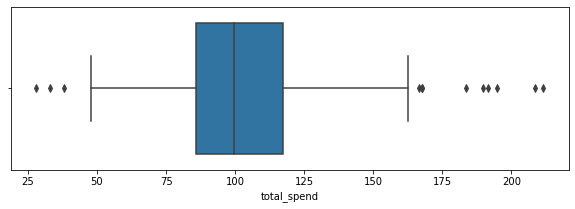

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize =(10, 3))
sns.boxplot(data=df_spend, x='total_spend')

# The median spending is about $100 per customer

In [16]:
# 2. What does the distribution of film revenue look like?

df_revenue = pd.read_sql_query("""
    select f.film_id, max(f.rental_rate)*count(r.rental_id) as revenue
    from film f join inventory i on f.film_id = i.film_id
    join rental r on i.inventory_id = r.inventory_id
    group by f.film_id
    ;""", con = conn)

In [17]:
df_revenue.head(10)

,film_id,revenue
0,652,13.86
1,273,24.75
2,51,68.77
3,951,27.72
4,70,84.83
5,839,6.93
6,350,99.80
7,758,23.92
8,539,29.90
9,278,34.93


<AxesSubplot:xlabel='revenue', ylabel='Count'>

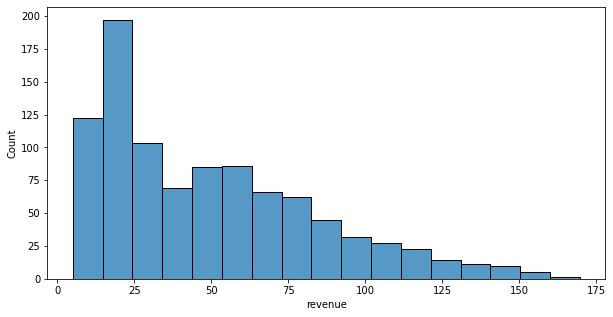

In [18]:
fig = plt.figure(figsize =(10, 5))
sns.histplot(data=df_revenue, x='revenue')

# The distribution of film revenue is right-skewed.

## Section 4: Analysis

In [19]:
# 1. On average, do some movie ratings generate more revenue than others?

df_rating_revenue = pd.read_sql_query("""
    select f.film_id, max(f.rating) as rating, sum(f.rental_rate) as revenue
    from film f join inventory i on f.film_id = i.film_id
    join rental r on i.inventory_id = r.inventory_id
    group by f.film_id
    ;""", con = conn)

In [20]:
df_rating_revenue2 = df_rating_revenue.groupby(['rating'])['revenue'].mean().to_frame()

df_rating_revenue2

,revenue
rating,
G,46.054211
NC-17,49.812228
PG,51.726120
PG-13,50.690845
R,47.678254


<AxesSubplot:xlabel='rating', ylabel='revenue'>

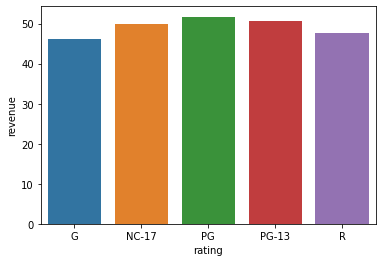

In [21]:
sns.barplot(data=df_rating_revenue2, x=df_rating_revenue2.index, y='revenue')

# Yes, PG films generate more revenue than other ratings. 

In [22]:
# 2. Do distributions of counts of rented films by category_id look the same for the 2 stores?

df_category = pd.read_sql_query("""
    select c.category_id, i.store_id, count(r.rental_id)
    from film_category c join film f on c.film_id = f.film_id
    join inventory i on f.film_id = i.film_id
    join rental r on i.inventory_id = r.inventory_id
    group by c.category_id, i.store_id
    order by 2, 1
    ;""", con = conn)

In [23]:
df_category.loc[df_category['store_id']==1,]

,category_id,store_id,count
0,1,1,596
1,2,1,568
2,3,1,453
3,4,1,447
4,5,1,502
5,6,1,450
6,7,1,576
7,8,1,557
8,9,1,524
9,10,1,455


In [24]:
df_category.loc[df_category['store_id']==2,]

,category_id,store_id,count
16,1,2,516
17,2,2,598
18,3,2,492
19,4,2,492
20,5,2,439
21,6,2,600
22,7,2,484
23,8,2,539
24,9,2,509
25,10,2,514


<AxesSubplot:xlabel='category_id', ylabel='count'>

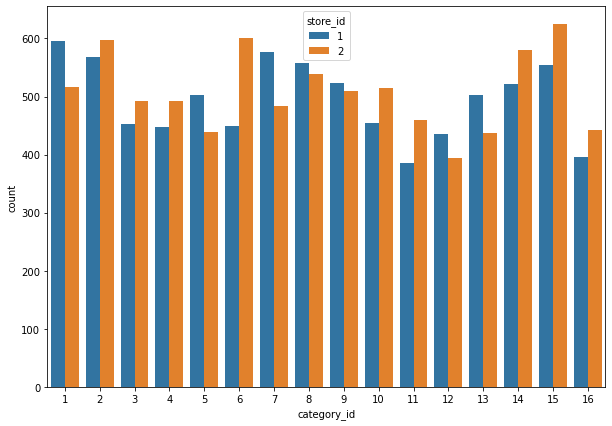

In [25]:
fig = plt.figure(figsize =(10, 7))
sns.barplot(data=df_category, x="category_id", y="count", hue="store_id")

# The distributions are generally similar for the two stores, while slightly different in category 1, 6, 7.

In [26]:
# 3. Do films that have a ‘husband’ (check the ‘fulltext’ field) generate the same amount of revenue as films that feature a ‘dinosaur’?

df_feature_revenue = pd.read_sql_query("""
    select f.film_id, f.rental_rate, r.rental_id, f.fulltext
    from film f join inventory i on f.film_id = i.film_id
    join rental r on i.inventory_id = r.inventory_id
    ;""", con = conn)

In [27]:
df_feature_revenue.head(10)

,film_id,rental_rate,rental_id,fulltext
0,333,2.99,2,'chase':17 'chef':11 'crocodil':14 'documentar...
1,373,2.99,3,'ancient':20 'china':21 'epistl':5 'girl':8 'g...
2,535,0.99,4,'abandon':19 'brilliant':4 'dentist':16 'explo...
3,450,2.99,5,'car':8 'compos':11 'drama':5 'fight':14 'idol...
4,613,0.99,6,'epic':4 'explor':16 'georgia':19 'hunter':11 ...
5,870,0.99,7,'boat':11 'conquer':14 'convent':21 'crocodil'...
6,510,4.99,8,'boy':8 'car':17 'insight':4 'lawless':1 'must...
7,565,4.99,9,'action':5 'action-pack':4 'california':20 'ma...
8,396,4.99,10,'action':5 'action-pack':4 'berlin':20 'boat':...
9,971,4.99,11,'administr':13 'bikini':2 'chef':9 'convent':2...


In [28]:
is_husband = []
for i in df_feature_revenue['fulltext']:
    if 'husband' in i:
        is_husband.append(True)
    else:
        is_husband.append(False)
        
pd.Series(is_husband).sum()

1356

In [29]:
is_dinosaur = []
for i in df_feature_revenue['fulltext']:
    if 'dinosaur' in i:
        is_dinosaur.append(True)
    else:
        is_dinosaur.append(False)

pd.Series(is_dinosaur).sum()

67

In [30]:
df_feature_revenue['husband_revenue'] = is_husband * df_feature_revenue['rental_rate']
df_feature_revenue['dinosaur_revenue'] = is_dinosaur * df_feature_revenue['rental_rate']

print("Films with husband generate revenue of %d" % df_feature_revenue['husband_revenue'].sum())
print("Films with dinosaur generate revenue of %d" % df_feature_revenue['dinosaur_revenue'].sum())

# Films with husband generate far more revenue than films with dinosaur.

Films with husband generate revenue of 4210
Films with dinosaur generate revenue of 202


In [31]:
cur.close()
conn.close()